<a href="https://colab.research.google.com/github/gdscbpdc/gdsc.github.io/blob/main/docs/Workshops/12_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Tensorflow**



## 1. What is Tensorflow?
 


### 1.1 Definition
Tensorflow is an open source library made by google that allows us to easily create powerful deep learning models and structures.
 


### 1.2 Deep Learning
Deep learning is a type of algorithm that learns information using these rough steps.
1. Get a labeled dataset of inputs mapped to outputs(think of this as example question and answers before a test).
2. Use a model to try and predict outputs based on inputs.
2. Get feedback on how close you are to the correct answer.
3. Update your knowledge and continue learning.

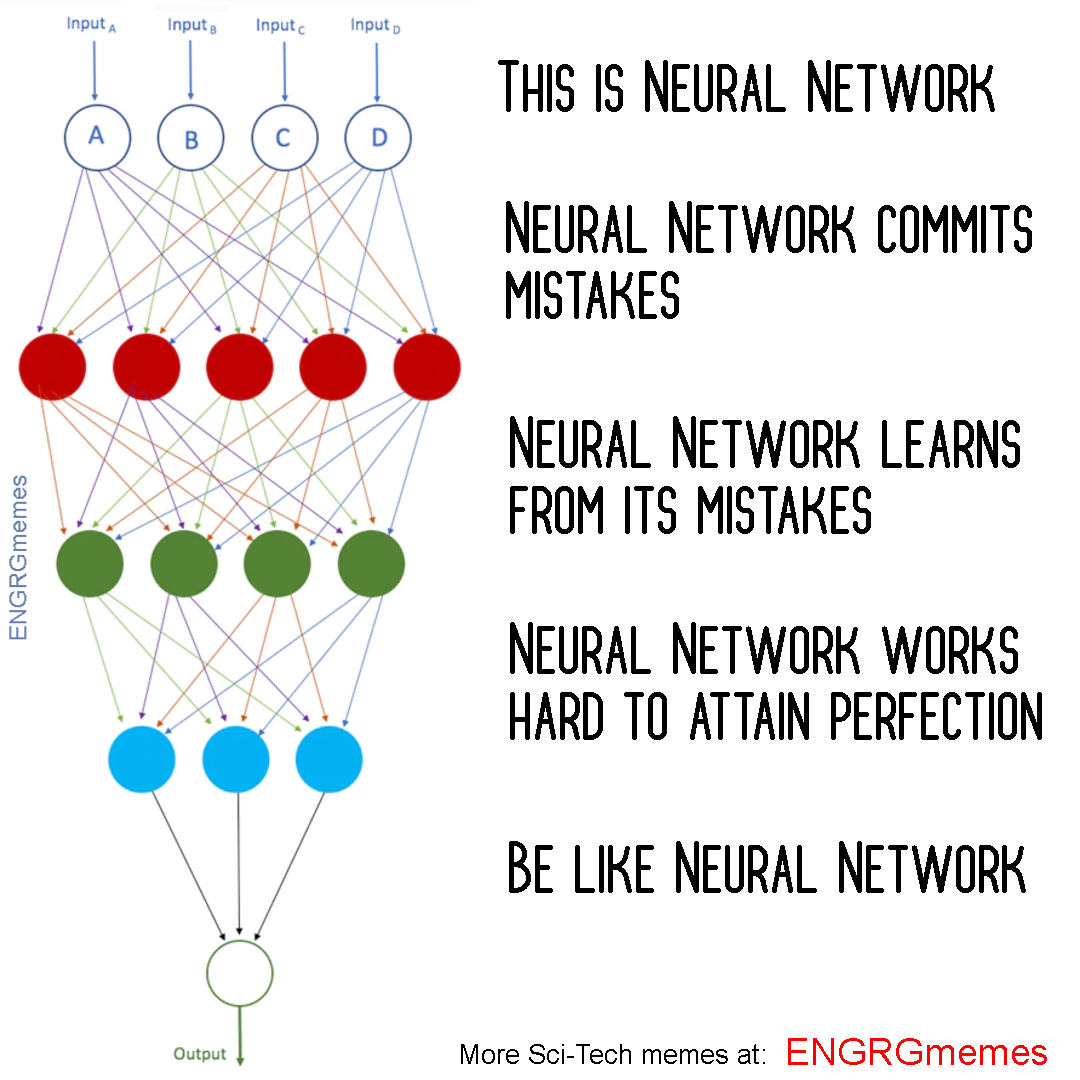

## 2. Breakdown of the process

We now breakdown the steps mentioned above and talk about how we can use them on a problem. To follow the basics visually, you can go to the [tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.27967&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) and view the training process.




### 2.1. Dataset
Your dataset is just a collection of examples where you take input data and tell the computer what the correct outputs for these examples are.

On the tensorflow playground we can select a dataset of our choice under the "DATA" section on the left-hand side.



### 2.2. Model
Deep learning models learn using a structure known as a Neural Network. It has this name because visualizations of these models look like neural pathways in our brains. While this sounds complicated, the model construction follows a fairly easy procedure. To construct this model we stack 'layers' on top of each other. While advancements in research have created many new types of layers for computation, many networks simply operate on a very simple layer known as a Dense layer. This layer performs three operations: 
1. Multiplies the inputs with a set of coefficients (these coefficients automatically learned as the model trains).
2. Add all of these terms together.
3. Pass this number through a non-linear function (also known as an activation fucntion). For most models using the function ReLU will work very well for all types of problems and TaNH can be good for some classification datasets.

The tensorflow playground will allow you to select these parameters using the GUI options in the center of your screen.



### 2.3 Evaluation of the Model

To give feedback to our model we will run it on the dataset and compare it's outputs to the results it was supposed to predict. We do this to find the error (difference) between the two values. Common evaluation functions for regression are Mean Squared Error and Mean Average Error. Common evaluation functions for classification are binary crossentropy (if you only have two classes) and categorical crossentropy (if you have many classes).

In tensorflow playground you will find this loss below the output category.

### 2.4 Learning

After the model is evaluated it must take this feedback and work on correcting it's mistakes. This is done using an optimizer which tells the model how to update the coefficients in the layers to reduce the error from the evaluation function. You will need to select two parts of this process :


1.   Choice of Optimizer : the Adam and RMSprop optimizers work best for most problems. We will train our models using these in this tutorial.
2.   Learning rate : This is how fast the model learns from it's mistakes as well as how big of a change it will make to correct them. If this number is too big, it will keep overcorrecting and never get that good. On the other hand, if this is too small it will take too long to train. The best value is in the middle of these extremes. A value of 0.001 is a good starting point for most problems.


Tensorflow playground uses RMSprop but allows you to select the learning rate.

## 3. Writing the Code

Running a model on example data is fun and good for learning, but to utilize these models on real-world problems we require code. Let us begin with importing the libraries.

In [ ]:
import tensorflow as tf # Tensorflow Import
import matplotlib.pyplot as plt # We use this to plot graphs

### 3.1 Coding the Dataset

We can import any dataset to use for our model. However, tensorflow already comes with pre-loaded datasets that we can use for learning purposes. To show you a simple neural network we will use the boston housing dataset. The aim of this dataset is to predict the average price of a home in an area of Boston given some information about the area. We store the information about the areas in train_x and test_x. The coresponding values for housing prices are stored in train_y and test_y.

In [ ]:
housing_train_data, housing_test_data = tf.keras.datasets.boston_housing.load_data()

housing_train_x, housing_train_y = housing_train_data

housing_test_x, housing_test_y = housing_test_data

In [ ]:
print(housing_train_x.shape, housing_train_y.shape, housing_test_x.shape, housing_test_y.shape)

(404, 13) (404,) (102, 13) (102,)


### 3.2 Constructing the Model

To begin we create a Sequential model. This means that the output of the previous layer is passed as input to the next layer in a linear order. After this we add some layers into our model in the order we intend to use them. This model will be made of dense layers like the ones we discussed in the prior section. The only new layer is known as the Input layer. This tells tensorflow the size of an input example so that it knows how big of an input to expect.

In [ ]:
import os
os.environ['TF_DETERMINISTIC_OPS'] = '1'
tf.random.set_seed(1)

housing_model = tf.keras.models.Sequential()

housing_model.add(tf.keras.layers.Input(shape = (13, ) )) # this says that each input is a list of 13 numerical values

# Hidden Layers
housing_model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
housing_model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
housing_model.add(tf.keras.layers.Dense(32, activation = tf.nn.relu))

# This is the output layer. It's size must match the output shape. As we are only trying to predict a single number, we set this to be one.
housing_model.add(tf.keras.layers.Dense(1, activation = tf.nn.relu))

housing_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


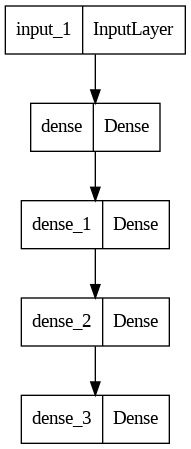

In [ ]:
# Visulizing the model we created in an image
tf.keras.utils.plot_model(housing_model)

### 3.3 Setting Training and Evaluation Parameters

For tensorflow, this is the stage where we need to define how our model is evaluated and how it will learn. For this we specify three things:


1.   Loss : This will be our evaluation function which gives us the error and the model it's feedback. We have selected mean squared error (mse).
2.   Optimizer : The optimizer our model uses to learn. We also specify our learning rate here. The Adam optimizer has been selected here.
3.   Metrics : This is like an evaluation function as it tells us the error the model achieves. However, the difference is that the model will not recive feedback from this; it is only for our information. Mean average error (mae) has been selected.


In [ ]:
housing_model.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ['mae'])

### 3.4 Training the Model

To train our model we simply give it the following information:


1.   X and y training data.
2.   Epochs : The number of times it runs the training algorithm.
3. Batch size : The number of examples it learns from at once. For example, if we set this to 32 the training data is split into batches where each batch has 32 training examples. We then take the examples one by one to run the model, evaluate it and use the optimizer. A single epoch is completed when all training batches have been seen once. This is especially useful with large datasets where tey may be too big to evaluate and optimize all at once.
4. Validation data : This data consists of new examples not present in the training set.This is used to verify that the model will perform well on new examples it has not seen before.



In [ ]:
history = housing_model.fit(housing_train_x, housing_train_y, epochs = 200, batch_size = 32, 
                            validation_data = (housing_test_x, housing_test_y))

Epoch 1/200
13/13 [==============================] - 3s 20ms/step - loss: 158.8385 - mae: 9.6381 - val_loss: 95.7954 - val_mae: 7.8068
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 76.3933 - mae: 6.3137 - val_loss: 65.9840 - val_mae: 6.0853
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 65.9594 - mae: 5.7446 - val_loss: 66.3625 - val_mae: 6.0314
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 62.5118 - mae: 5.5272 - val_loss: 74.6212 - val_mae: 6.8268
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 74.0129 - mae: 6.4932 - val_loss: 69.1981 - val_mae: 6.3276
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 59.4877 - mae: 5.2731 - val_loss: 60.4491 - val_mae: 5.7421
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 57.2982 - mae: 5.2019 - val_loss: 64.5019 - val_mae: 5.7485
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - 

### 3.4 Evaluating The Model

In [ ]:
history = history.history

In [ ]:
print(history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


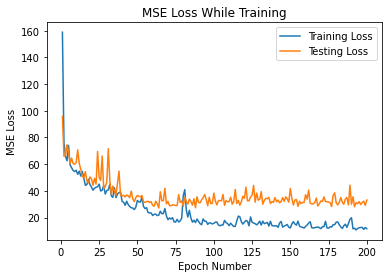

In [ ]:
plt.plot(range(1, 201), history['loss'])
plt.plot(range(1, 201), history['val_loss'])

plt.title('MSE Loss While Training')
plt.xlabel('Epoch Number')
plt.ylabel('MSE Loss')
plt.legend(['Training Loss', 'Testing Loss'])
plt.show()

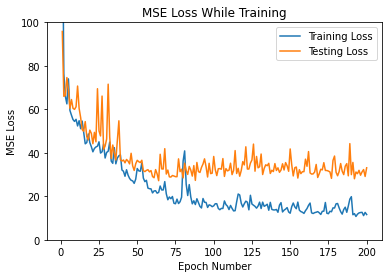

In [ ]:
plt.plot(range(1, 201), history['loss'])
plt.plot(range(1, 201), history['val_loss'])

plt.title('MSE Loss While Training')
plt.xlabel('Epoch Number')
plt.ylabel('MSE Loss')
plt.legend(['Training Loss', 'Testing Loss'])
plt.ylim(0, 100)
plt.show()

In [ ]:
# We can also evaluate our model after training

housing_model.evaluate(housing_train_x, housing_train_y)

13/13 [==============================] - 0s 3ms/step - loss: 10.2159 - mae: 2.3925


[10.215892791748047, 2.3924641609191895]

In [ ]:
housing_model.evaluate(housing_test_x, housing_test_y)

4/4 [==============================] - 0s 6ms/step - loss: 33.1137 - mae: 3.8703


[33.11373519897461, 3.8702917098999023]

## 4. Neural Networks for Image Datasets

In computer programing images are represented as 3D array where the dimensions are width, height, 3. The 3 at the end represents the RGB (red, green, blue) value of the colour at that pixel.


As these images can often be large, we don't normally use dense layers on them directly. We first simplify the images using convolutional and pooling layers. The goal of these layers is to look at sections of an image (groups of pixels) and then condensing this group into a single value. Below are graphic representations of how these layers work.

Convolutional layers work by multiplying the group of pixels by an array (also called a filter) of numbers and then adding them together. Like Dense layers the value of these arrays are learnt while training. We often multiply a group by multiple pixels and save all the results.

Pooling layers work by finding a metric such as the mean, max or minimum value of the pixels in this group.

### 4.1 Convolutional Layer Format

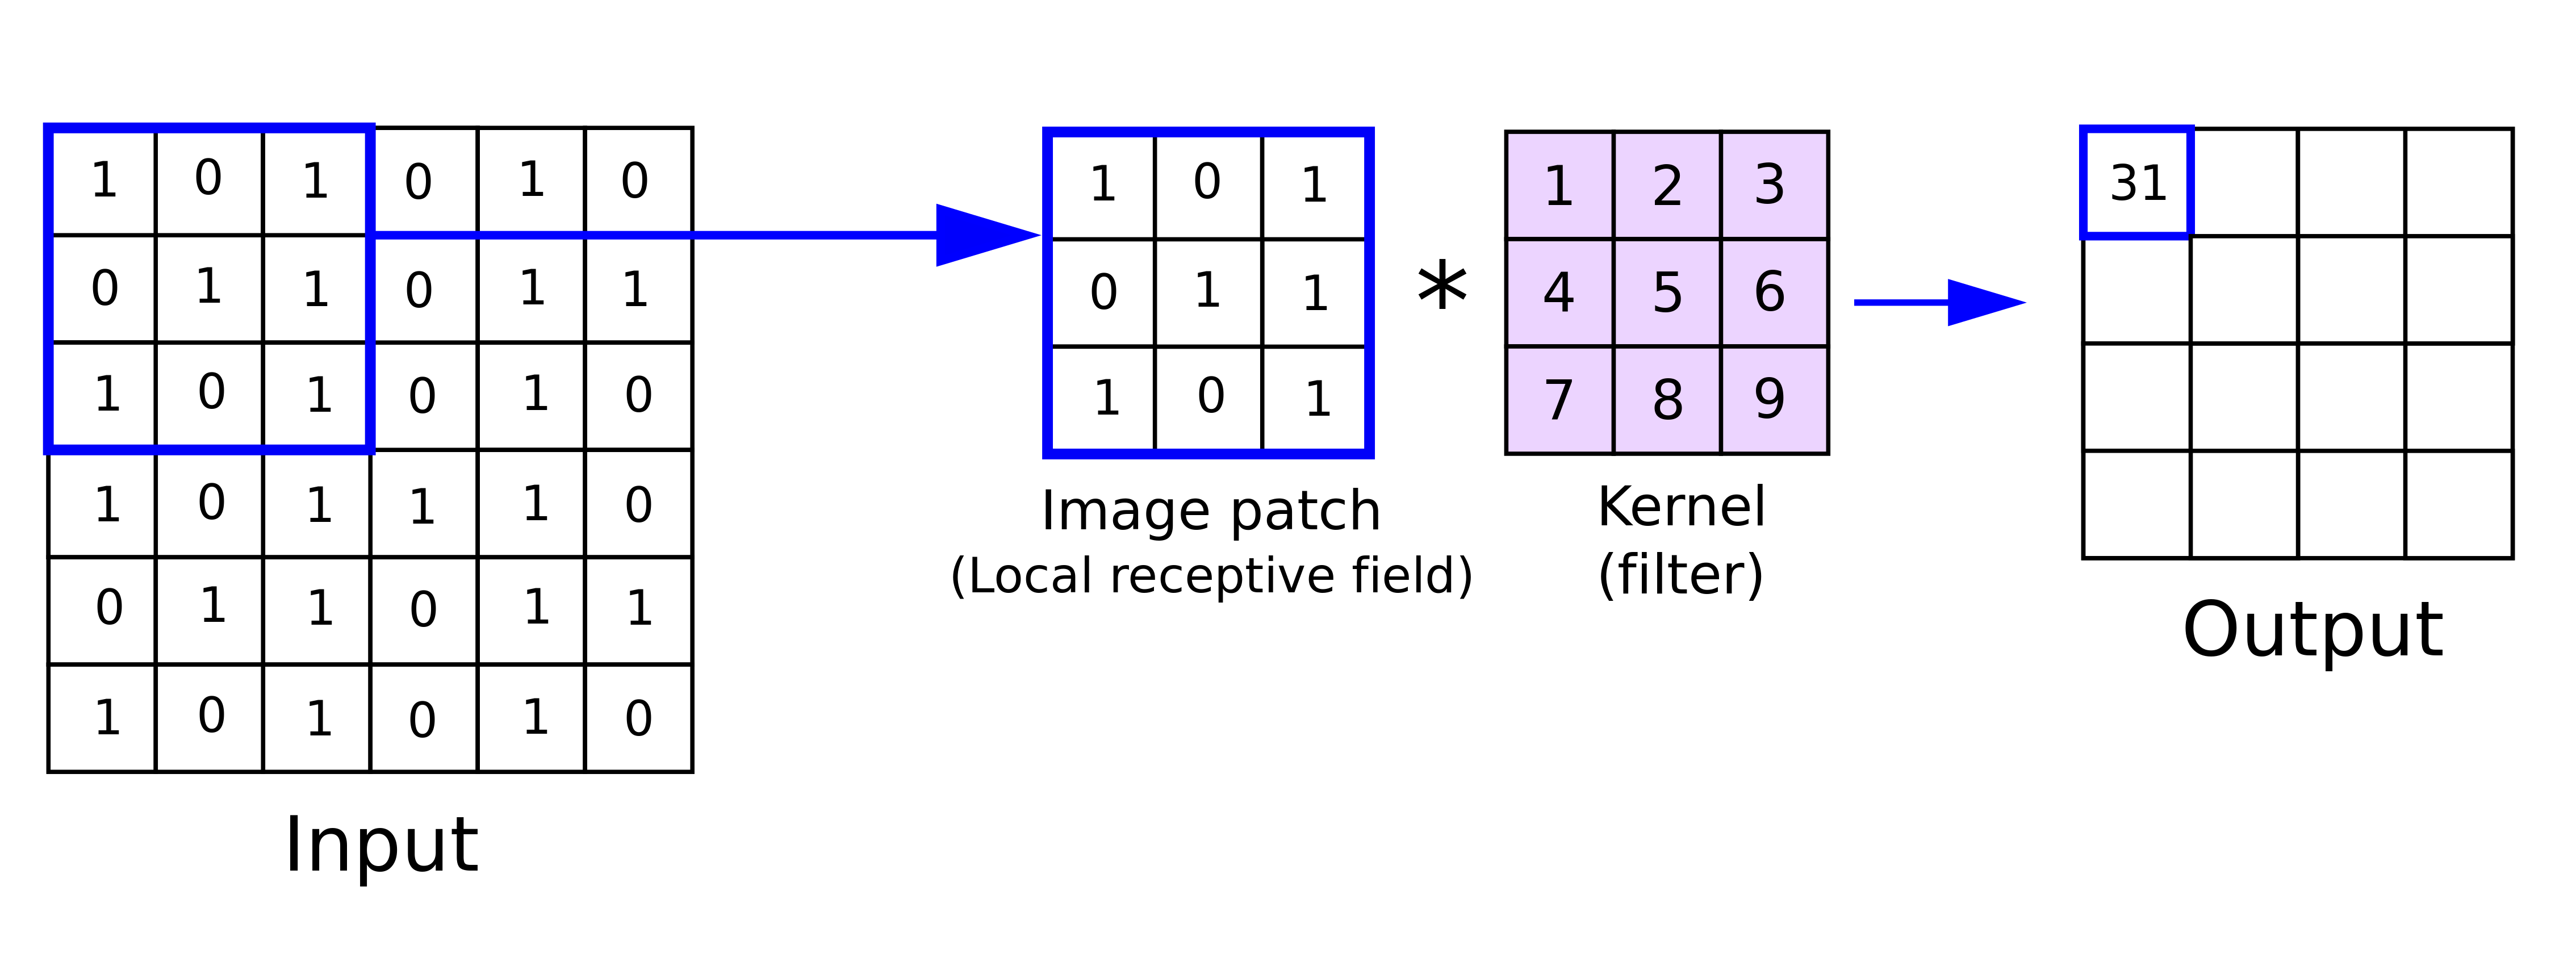



### 4.2 Pooling Layer Format

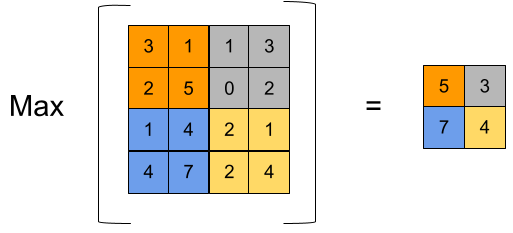

### 4.3 Overall Model Structure




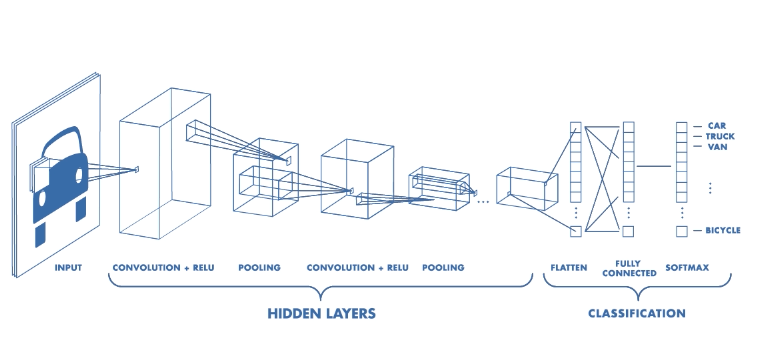



### 4.4 Cifar 10 Image Dataset

This is an image dataset with 10 classes of images of common pictures such as dogs or cats. Click on the link to the documentation to learn more [cifar 10](https://keras.io/api/datasets/cifar10/).
 

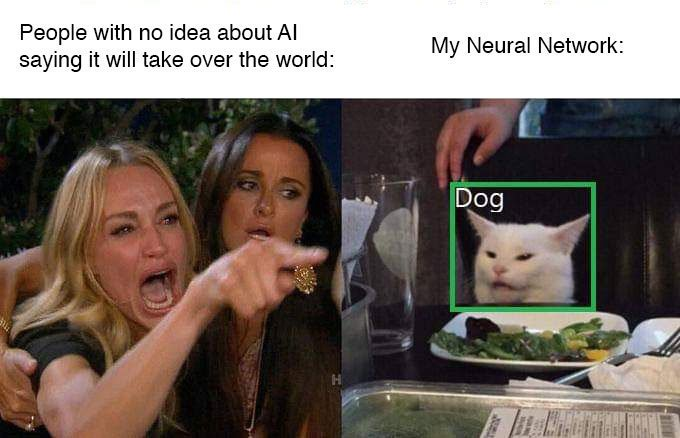



In [ ]:
cf_10_train_data, cf_10_test_data = tf.keras.datasets.cifar10.load_data()


cf_10_train_x, cf_10_train_y = cf_10_train_data

cf_10_test_x, cf_10_test_y = cf_10_test_data


cf_10_train_y = tf.one_hot(cf_10_train_y.reshape((-1, )), 10)
cf_10_test_y = tf.one_hot(cf_10_test_y.reshape((-1, )), 10)

In [ ]:
print(cf_10_train_x.shape, cf_10_train_y.shape)
print(cf_10_test_x.shape, cf_10_test_y.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


### 4.5 Building a CNN Model

In [ ]:
cf_10_model = tf.keras.models.Sequential()

cf_10_model.add(tf.keras.layers.Input(shape = (32, 32, 3))) # input shape for our images


# Convolutional layer with 16 filters each of size (3, 3) and a relu activation function
cf_10_model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))
cf_10_model.add(tf.keras.layers.MaxPooling2D())

# Convolutional layer with 32 filters each of size (3, 3) and a relu activation function

cf_10_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
cf_10_model.add(tf.keras.layers.MaxPooling2D())

# Convert the data from 3 dimentions to 1 dimention
cf_10_model.add(tf.keras.layers.Flatten())
# Hidden Dense Layer
cf_10_model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))

# Output Layer 
# 10 outputs, one for each class as the model will output the probability of each individual class
cf_10_model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

cf_10_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

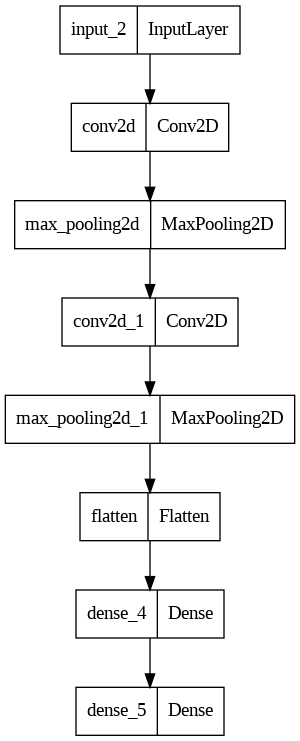

In [ ]:
tf.keras.utils.plot_model(cf_10_model)

### 4.6 Compiling the Model

We use categorical crossentropy to calculate loss for many classes, Adam for optimization and use Accuracy as a metric so we can understand how well the model is performing.

In [ ]:
cf_10_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(0.001), metrics = ['Acc'])

### 4.7 Training the Model

In [ ]:
history = cf_10_model.fit(cf_10_train_x, cf_10_train_y, epochs = 20, batch_size = 1024,
                validation_data = (cf_10_test_x, cf_10_test_y))

Epoch 1/20
49/49 [==============================] - 4s 26ms/step - loss: 13.5017 - Acc: 0.1346 - val_loss: 2.6569 - val_Acc: 0.1639
Epoch 2/20
49/49 [==============================] - 1s 15ms/step - loss: 2.2346 - Acc: 0.2025 - val_loss: 2.0436 - val_Acc: 0.2622
Epoch 3/20
49/49 [==============================] - 1s 15ms/step - loss: 1.9384 - Acc: 0.3068 - val_loss: 1.8320 - val_Acc: 0.3497
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 1.7267 - Acc: 0.3842 - val_loss: 1.7202 - val_Acc: 0.3964
Epoch 5/20
49/49 [==============================] - 1s 15ms/step - loss: 1.5805 - Acc: 0.4358 - val_loss: 1.5615 - val_Acc: 0.4397
Epoch 6/20
49/49 [==============================] - 1s 15ms/step - loss: 1.4846 - Acc: 0.4724 - val_loss: 1.4933 - val_Acc: 0.4700
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 1.4071 - Acc: 0.5024 - val_loss: 1.4392 - val_Acc: 0.4926
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 1.3645 - 

### 4.8 Evaluating the Model

In [ ]:
history = history.history

In [ ]:
print(history.keys())

dict_keys(['loss', 'Acc', 'val_loss', 'val_Acc'])


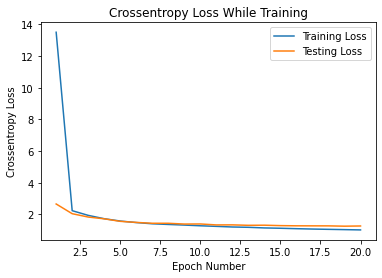

In [ ]:
plt.plot(range(1, 21), history['loss'])
plt.plot(range(1, 21), history['val_loss'])

plt.title('Crossentropy Loss While Training')
plt.xlabel('Epoch Number')
plt.ylabel('Crossentropy Loss')
plt.legend(['Training Loss', 'Testing Loss'])
plt.show()

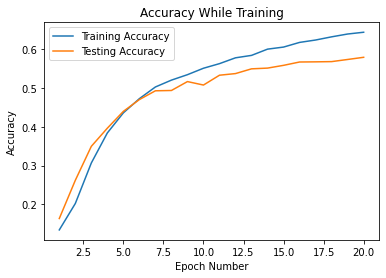

In [ ]:
plt.plot(range(1, 21), history['Acc'])
plt.plot(range(1, 21), history['val_Acc'])

plt.title('Accuracy While Training')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Testing Accuracy'])

plt.show()

## 5. Transfer Learning

Images can be varied and complex, large image datasets with 1000+ classes can take hours or days to train a model with. However, the learned numeric values and structure of convolutional and pooling layers can be very similar even with different datasets. For this reason we use a technique known as transfer learning which is where we take the convolutional and pooling layers of a large model trained by professionals, add new dense layers and apply them to our dataset.

This can often give us much higher accuracy with fewer epochs.

### 5.1 Downloading a Model

For this dataset we download the RegNetX160 model and tell it to expect an input size of (32, 32, 3). We also set it's trainable attribute to false as we do not want to re-train it, only to use the model.


To fully utilize this potential [this](https://keras.io/api/applications/) is a link to a list with names and information regarding each model in the keras library. If you are looking for larger, more complex or different problem types (such as text, video, audio, etc) look at models in the [Tensorflow Hub](https://tfhub.dev/) site with a more exhaustive library of Neural Network models.

In [ ]:
base_model = tf.keras.applications.RegNetX160(input_shape=(32, 32, 3), 
                                               include_top=False,
                                               weights='imagenet')


base_model.trainable = False

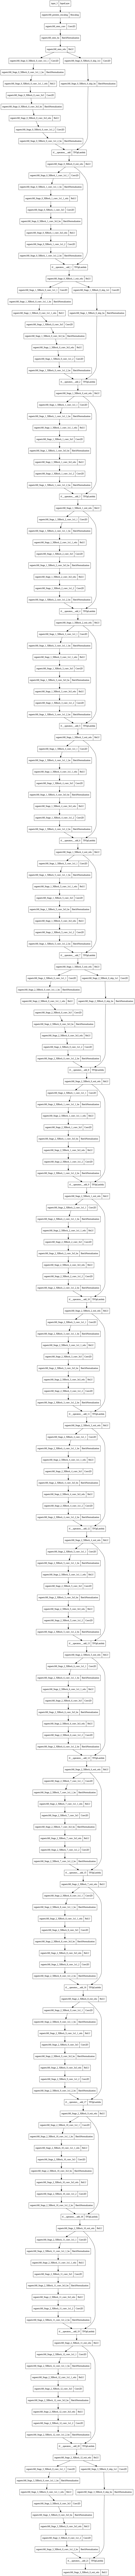

In [ ]:
# We can plot the structure of this model
tf.keras.utils.plot_model(base_model)

### 5.2 Creating a New Model using the Pretrained Model

In [ ]:
new_cf_10_model = tf.keras.models.Sequential()
new_cf_10_model.add(tf.keras.layers.Input(shape = (32, 32, 3)))

# Adding the pre-trained model
new_cf_10_model.add(base_model)

new_cf_10_model.add(tf.keras.layers.Flatten())

new_cf_10_model.add(tf.keras.layers.Dense(512, activation = tf.nn.relu))
new_cf_10_model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
new_cf_10_model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
new_cf_10_model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

new_cf_10_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 regnetx160 (Functional)     (None, 1, 1, 2048)        52340704  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 53,555,306
Trainable params: 1,214,602
N

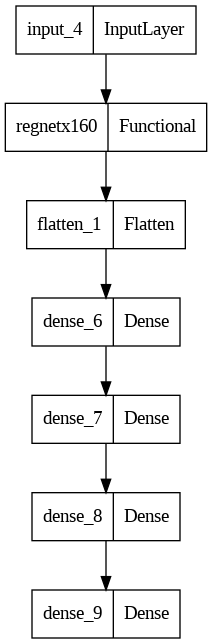

In [ ]:
tf.keras.utils.plot_model(new_cf_10_model)

### 5.3 Compile the Model

In [ ]:
new_cf_10_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(0.001), metrics = ['Acc'])

### 5.4 Training the Model

In [ ]:
history = new_cf_10_model.fit(cf_10_train_x, cf_10_train_y, epochs = 5, 
                              batch_size = 4096,
                              validation_data = (cf_10_test_x, cf_10_test_y))

Epoch 1/5
13/13 [==============================] - 68s 4s/step - loss: 2.0653 - Acc: 0.3782 - val_loss: 1.1724 - val_Acc: 0.5880
Epoch 2/5
13/13 [==============================] - 31s 2s/step - loss: 1.0604 - Acc: 0.6350 - val_loss: 0.9637 - val_Acc: 0.6685
Epoch 3/5
13/13 [==============================] - 31s 2s/step - loss: 0.8973 - Acc: 0.6910 - val_loss: 0.8570 - val_Acc: 0.7048
Epoch 4/5
13/13 [==============================] - 31s 2s/step - loss: 0.8084 - Acc: 0.7184 - val_loss: 0.8088 - val_Acc: 0.7181
Epoch 5/5
13/13 [==============================] - 31s 2s/step - loss: 0.7579 - Acc: 0.7360 - val_loss: 0.7665 - val_Acc: 0.7323


### 5.5 Evaluation

In [ ]:
history = history.history

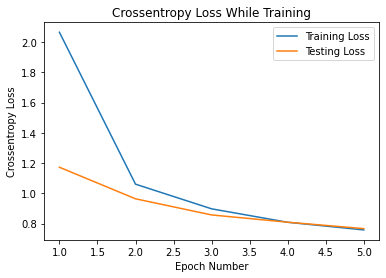

In [ ]:
plt.plot(range(1, 6), history['loss'])
plt.plot(range(1, 6), history['val_loss'])

plt.title('Crossentropy Loss While Training')
plt.xlabel('Epoch Number')
plt.ylabel('Crossentropy Loss')
plt.legend(['Training Loss', 'Testing Loss'])
plt.show()

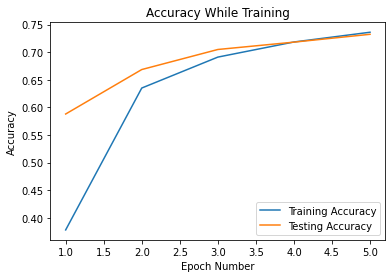

In [ ]:
plt.plot(range(1, 6), history['Acc'])
plt.plot(range(1, 6), history['val_Acc'])

plt.title('Accuracy While Training')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Testing Accuracy'])

plt.show()

## 6. Try It Yourself

Below are some more datasets I have loaded for you to try and train models on. See how far you can reach!

In [ ]:
import pandas as pd # used to read the csv dataset file

### 6.1 California Housing (Easy)


Train a regression model on this dataset.

In [ ]:
ch_train_data = pd.read_csv("/content/sample_data/california_housing_train.csv")

ch_train_data_x = ch_train_data.drop("median_house_value", axis = 1).to_numpy()
ch_train_data_y = ch_train_data["median_house_value"].to_numpy()

ch_train_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
0          1015.0       472.0         1.4936             66900.0  
1          1129.0       463.0         1.8200             80100.0  
2           333.0       117.0         1.6509             85700.0  
3           515.0       226.0         3.1917             73400.0  
4           624.0       262.0         1.9250             65500.0  
...           ...         ...            ...                 ...  
16995       907.0       369.0         2.3571            111400.0  
16996      1194.0       465.0         2.5179             79000.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0  

[17000 rows x 9 columns]

In [ ]:
ch_test_data = pd.read_csv("/content/sample_data/california_housing_test.csv")

ch_test_data_x = ch_test_data.drop("median_house_value", axis = 1).to_numpy()
ch_test_data_y = ch_test_data["median_house_value"].to_numpy()

In [ ]:
print(ch_train_data_x.shape, ch_train_data_y.shape)

(17000, 8) (17000,)


In [ ]:
## Create your model here

In [ ]:
## Compile your model here

In [ ]:
## Train your model here

### 6.2 Pre-trained Cifar 100 (Medium)

We now use a larger version of the cifar data set with 100 different classes. In this section try to get a good accuracy score using a pretrained model. Here is the link to the dataset site : [Cifar 100](https://keras.io/api/datasets/cifar100/)

You can use the same base model as we used before, but I encourage you to try another one and see how it works. You can even try to find models from [Tensorflow Hub](https://tfhub.dev/).

In [ ]:
cf_100_train_data, cf_100_test_data = tf.keras.datasets.cifar100.load_data()


cf_100_train_x, cf_100_train_y = cf_100_train_data

cf_100_test_x, cf_100_test_y = cf_100_test_data


cf_100_train_y = tf.one_hot(cf_100_train_y.reshape((-1, )), 100)
cf_100_test_y = tf.one_hot(cf_100_test_y.reshape((-1, )), 100)

In [ ]:
print(cf_100_train_x.shape, cf_100_train_y.shape)
print(cf_100_test_x.shape, cf_100_test_y.shape)

(50000, 32, 32, 3) (50000, 100)
(10000, 32, 32, 3) (10000, 100)


In [ ]:
## Import a model here

In [ ]:
## Create your model here

In [ ]:
## Compile your model here

In [ ]:
## Train your model here

### 6.3 From Scratch Cifar 100 (Hard)

Here you are expected to write a CNN from scratch to train on the cifar 100 dataset. Note that this model will need to be larger than the one used on the cifar 10 dataset as this is more complex.

In [ ]:
cf_100_train_data, cf_100_test_data = tf.keras.datasets.cifar100.load_data()


cf_100_train_x, cf_100_train_y = cf_100_train_data

cf_100_test_x, cf_100_test_y = cf_100_test_data


cf_100_train_y = tf.one_hot(cf_100_train_y.reshape((-1, )), 100)
cf_100_test_y = tf.one_hot(cf_100_test_y.reshape((-1, )), 100)

In [ ]:
print(cf_100_train_x.shape, cf_100_train_y.shape)
print(cf_100_test_x.shape, cf_100_test_y.shape)

(50000, 32, 32, 3) (50000, 100)
(10000, 32, 32, 3) (10000, 100)


In [ ]:
## Create your model here

In [ ]:
## Compile your model here

In [ ]:
## Train your model here

# Hope You Enjoyed Learning Neural Networks

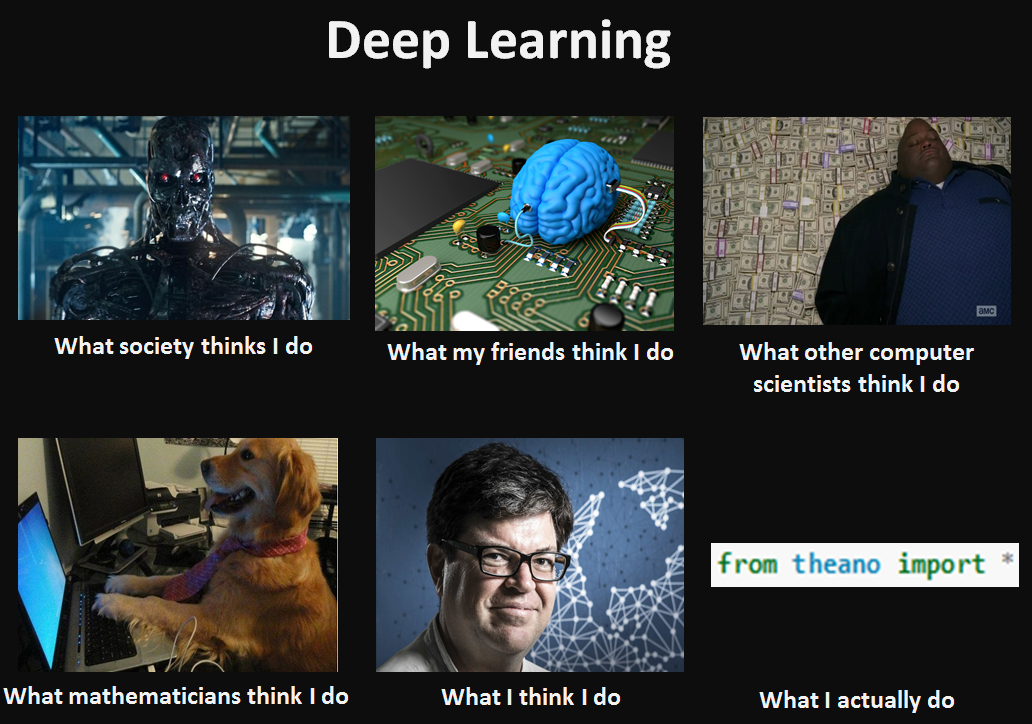